1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import seaborn as sns

# output plots
!mkdir plots

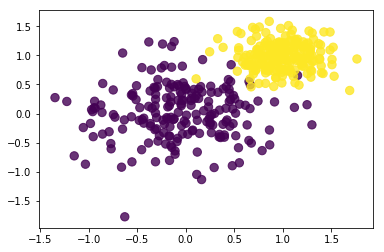

In [4]:
from IPython.display import Image
Image('../lectures/two_categories_scatter_plot.png')

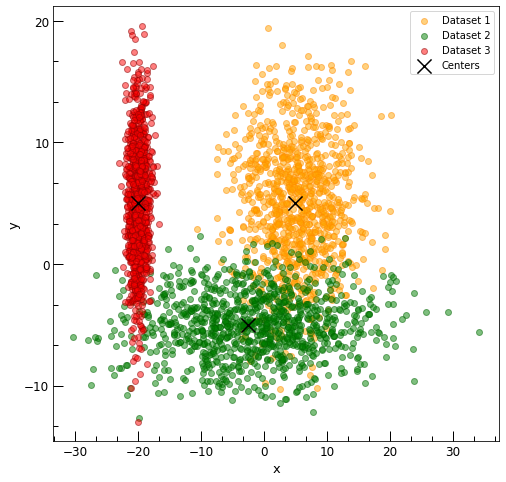

In [5]:
# function to generate 2d gaussian samples (x and y are non-covariant)
def gauss2d(muX, sigmaX, muY, sigmaY, size):
    x = np.random.normal(muX, sigmaX, size)
    y = np.random.normal(muY, sigmaY, size)
    return x, y

# plot layout
fig, ax = plt.subplots(figsize=(8, 8))
#fig.tight_layout()

# generate dataset
x1, y1 = gauss2d(5., 5., 5., 5., 1000)
x2, y2 = gauss2d(-2.5, 10., -5., 2.5, 1000)
x3, y3 = gauss2d(-20, 1., 5., 5., 1000)

# plot
ax.scatter( x1, y1, marker='o', color='orange', edgecolor='darkorange', alpha=0.5, label='Dataset 1')
ax.scatter( x2, y2, marker='o', color='green', edgecolor='darkgreen', alpha=0.5, label='Dataset 2')
ax.scatter( x3, y3, marker='o', color='red', edgecolor='darkred', alpha=0.5, label='Dataset 3')

# ticks
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='major', width=1.0, length=10, direction="in", labelsize=12)
ax.tick_params(which='minor', width=1.0, length=5, direction="in", labelsize=12)

# centers
ax.scatter( x=5., y=5., marker='x', color='black', s=200)
ax.scatter( x=-2.5, y=-5., marker='x', color='black', s=200)
ax.scatter( x=-20, y=5., marker='x', color='black', s=200, label='Centers')

# labels
ax.set_xlabel("x", fontsize=13)
ax.set_ylabel("y", fontsize=13)
ax.legend(loc="upper right", markerscale=1)

# show and save
plt.show()
fig.savefig("plots/scatterPlot.pdf")

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [5]:
# get data
#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

In [6]:
fName = "data/residuals_261.pkl"

# convert the .pkl file into a pandas DataFrame
df = pd.DataFrame(np.load(fName, allow_pickle=True).item())
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [7]:
# clean the data
data = df[np.abs(df['residuals']) < 2]
data

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


The r-value is 0.04340351052255907

In particular, the Pearson correlation matrix of the Data is
            residuals  distances
residuals   1.000000   0.043404
distances   0.043404   1.000000

The q-value of the operated interpolation is
 8.717037183576494e-06


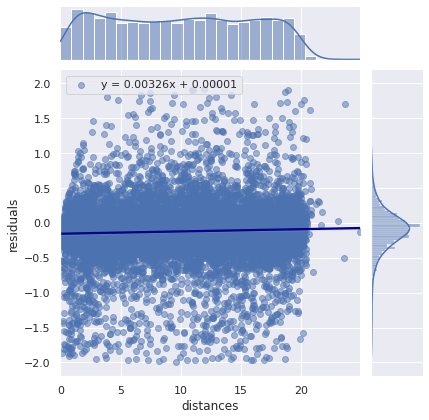

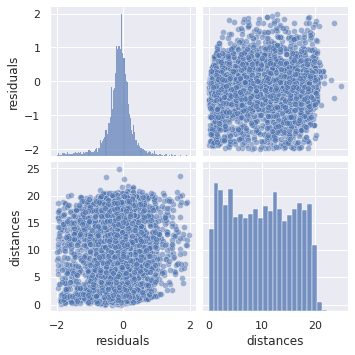

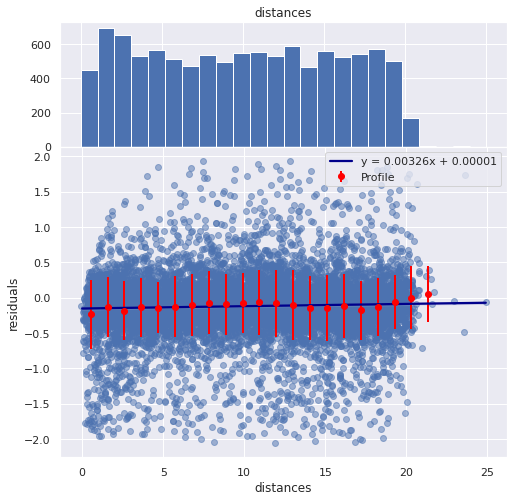

In [9]:
'''
    Plot a seaborn jointplot and display
    the linear regression.
'''

# set seaborn style
sns.set_theme()

# fit with y = mx + q
m, q, r, q, _ = sp.stats.linregress(data['distances'], data['residuals']) 


# jointplot
jp = sns.jointplot(x="distances", y="residuals", data=data, kind="reg", scatter_kws={'alpha':0.5},
                   joint_kws={'line_kws':{'color':'darkblue'}, 'label':"y = {0:1.5f}x + {1:1.5f}".format(m, q)})

# legend
jp.ax_joint.legend()

'''
    Comment on the correlation between those 
    variables: the relation between 'residuals'
    and 'distances' seems to be linear (looking at 
    the linear regression), although the correlation
    of the variables is near-zero. More on the correlations
    can be visualized by using the seaborn.pairplot()
    function. Finally, the quality of the fit can be
    inspected.
'''

# use the seaborn built- in function
sns.pairplot(data, plot_kws={'alpha':0.5})

# parameters that can be indices of fit quality 
print("The r-value is", r)
print("\nIn particular, the Pearson correlation matrix of the Data is\n", data.corr(method='pearson'))
print("\nThe q-value of the operated interpolation is\n", q)

'''
    Manually create the histogram for the 
    'distances' variable and plot it stacked
    on top of the scatter plot. Create the
    profile plot.
'''

# plot layout
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), gridspec_kw={'height_ratios':[2, 5]})


# choose bin spacing
bins = np.linspace(0., 25., 25)

# get bin centers
binCenters = (bins[1:] + bins[:-1]) / 2

# plot histogram
data.hist("distances", bins=bins, ax=ax1)

# scatter plot
jp2 = sns.regplot(x="distances", y="residuals", data=data, x_jitter=0.1, y_jitter=0.1, scatter_kws={'alpha':0.5},
                   line_kws={'color':'darkblue', 'label':"y = {0:1.5f}x + {1:1.5f}".format(m, q)}, ax=ax2)

# create arrays
x = binCenters
y = np.array([data.loc[(data['distances'] < bins[i+1]) & (data['distances'] >= bins[i])]['residuals'].mean() for i in range(len(x)-2)])
err_y = np.array([data.loc[(data['distances'] < bins[i+1]) & (data['distances'] >= bins[i])]['residuals'].std() for i in range(len(x)-2)])

# generate profile plot
jp2.errorbar(x=x[:22], y=y, yerr=err_y, label="Profile", linewidth=2, color='red', marker='o', linestyle="")

# merge plots and show legend
plt.subplots_adjust(hspace=0.)
jp2.legend()

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


In [11]:
# reset style to default matplotlib
sns.reset_orig()

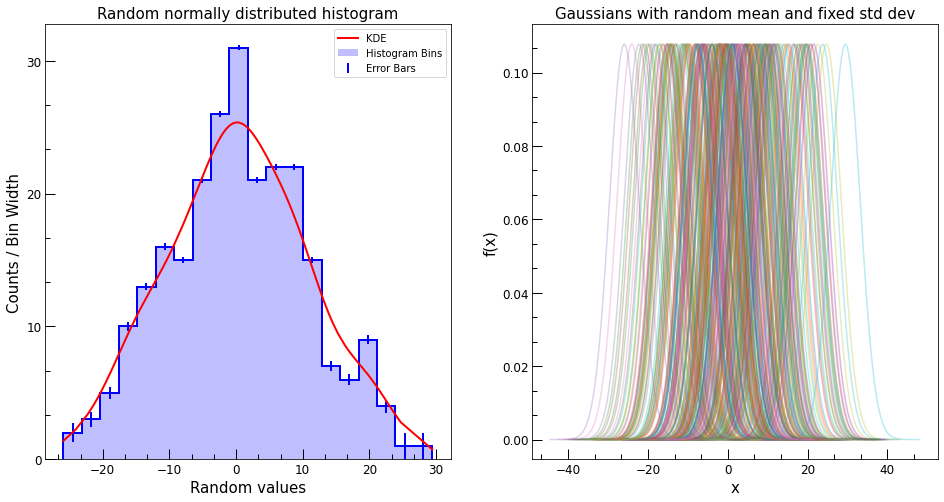

In [21]:
'''
    Histogram of random normally distributed numbers.
'''

# array of normally distributed numbers
x = np.random.normal(loc=0., scale=10., size=(250,))

# plot layout
fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# histogram
y, binEdges, _ = ax.hist(x, bins=20, histtype="stepfilled", label="Histogram Bins", facecolor="blue", alpha=0.25)
_ = ax.hist(x, bins=20, histtype="step", edgecolor="blue", linewidth=2)

# histogram layout
binCenters = 0.5 * (binEdges[1:] + binEdges[:-1])
binWidth = binEdges[1] - binEdges[0]

# set Poisson uncertainty on each bin
binErrors = np.zeros(len(y))
for i in range(len(y)):
    
    # take care of divisions by zero
    if y[i] > 0:
        binErrors[i] = 1. / np.sqrt(y[i])
    else:
        binErrors[i] = 0
    
# plot errorbars
ax.errorbar(binCenters, y, binErrors, fmt = 'none', label = "Error Bars", ecolor="blue", linewidth=2)

# ticks
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(AutoMinorLocator(3))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(3))
ax.tick_params(which='major', width=1.0, length=10, direction="in", labelsize=12)
ax.tick_params(which='minor', width=1.0, length=5, direction="in", labelsize=12)

# labels
ax.set_title("Random normally distributed histogram", fontsize=15)
ax.set_xlabel("Random values", fontsize=15)
ax.set_ylabel("Counts / Bin Width", fontsize=15)

'''
    Gaussian functions plots
'''

# default standard deviation
stdDev = 1.06 * x.std() * (x.size**(-1./5))

# plot a gaussian for every value
for i in x:
    
    # set the domain of the gaussians
    low = i - 5 * stdDev
    high = i + 5 * stdDev
    domain = np.linspace(low, high, 1000)
    
    # plot using scipy to define the function
    ax2.plot(domain, sp.stats.norm.pdf(domain, loc=i, scale=stdDev), alpha = 0.3)

# ticks
ax2.xaxis.set_major_locator(MultipleLocator(20))
ax2.xaxis.set_minor_locator(AutoMinorLocator(3))
ax2.yaxis.set_major_locator(MultipleLocator(0.02))
ax2.yaxis.set_minor_locator(AutoMinorLocator(3))
ax2.tick_params(which='major', width=1.0, length=10, direction="in", labelsize=12)
ax2.tick_params(which='minor', width=1.0, length=5, direction="in", labelsize=12)

# labels
ax2.set_title("Gaussians with random mean and fixed std dev", fontsize=15)
ax2.set_xlabel("x", fontsize=15)
ax2.set_ylabel("f(x)", fontsize=15)

'''
    Kernel Density Estimate
'''

# sum all the gaussians
t = []
for i in np.sort(x):
    t.append(binWidth * np.sum(sp.stats.norm.pdf(x, loc=i, scale=stdDev)))
t = np.array(t)

# normalize the results
intGauss = sp.integrate.trapz(t, np.sort(x))
intHist = sp.integrate.trapz(y, binCenters)    
norm = intHist / intGauss

# superimpose the result
ax.plot(np.sort(x), t * norm, color='red', linewidth=2, label='KDE')

# set legend
ax.legend(loc="upper right", markerscale=1)

# show and save
plt.show()
fig.savefig("plots/kdePlot.pdf")